pygame 2.0.0.dev10 (SDL 2.0.12, python 3.8.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


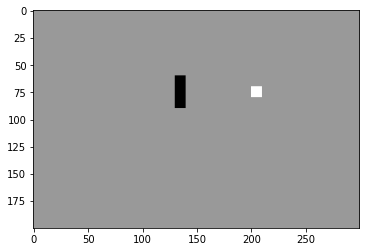

In [2]:
#pip install pygame
import pygame
import time
import random
import matplotlib.pyplot as plt 
import numpy as np 

pygame.init()
 
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)
 
dis_width = 300
dis_height = 200
 
dis = pygame.display.set_mode((dis_width, dis_height))
pygame.display.set_caption('Snake Game')
 
clock = pygame.time.Clock()
 
snake_block = 10
snake_speed = 15
 
font_style = pygame.font.SysFont("bahnschrift", 25)
score_font = pygame.font.SysFont("comicsansms", 35)
 
 
def Your_score(score):
    value = score_font.render("Your Score: " + str(score), True, yellow)
    dis.blit(value, [0, 0])
 
 
 
def our_snake(snake_block, snake_list):
    for x in snake_list:
        pygame.draw.rect(dis, black, [x[0], x[1], snake_block, snake_block])
 
 
def message(msg, color):
    mesg = font_style.render(msg, True, color)
    dis.blit(mesg, [dis_width / 6, dis_height / 3])
 
 
def gameLoop():
    game_over = False
    game_close = False
 
    x1 = dis_width / 2
    y1 = dis_height / 2
 
    x1_change = 0
    y1_change = 0
 
    snake_List = []
    Length_of_snake = 1
 
    foodx = round(random.randrange(0, dis_width - snake_block) / 10.0) * 10.0
    foody = round(random.randrange(0, dis_height - snake_block) / 10.0) * 10.0
 
    while not game_over:
 
        while game_close == True:
            dis.fill(blue)
            message("C-Play Again or Q-Quit", red)
#            Your_score(Length_of_snake - 1)
            pygame.display.update()
 
            for event in pygame.event.get():
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_q:
                        game_over = True
                        game_close = False
                    if event.key == pygame.K_c:
                        gameLoop()
 
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_over = True
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x1_change = -snake_block
                    y1_change = 0
                elif event.key == pygame.K_RIGHT:
                    x1_change = snake_block
                    y1_change = 0
                elif event.key == pygame.K_UP:
                    y1_change = -snake_block
                    x1_change = 0
                elif event.key == pygame.K_DOWN:
                    y1_change = snake_block
                    x1_change = 0
 
        if x1 >= dis_width or x1 < 0 or y1 >= dis_height or y1 < 0:
            game_close = True
        x1 += x1_change
        y1 += y1_change
        dis.fill(blue)
        pygame.draw.rect(dis, green, [foodx, foody, snake_block, snake_block])
        snake_Head = []
        snake_Head.append(x1)
        snake_Head.append(y1)
        snake_List.append(snake_Head)
        if len(snake_List) > Length_of_snake:
            del snake_List[0]
 
        for x in snake_List[:-1]:
            if x == snake_Head:
                game_close = True
 
        our_snake(snake_block, snake_List)
#        Your_score(Length_of_snake - 1)
 
        pygame.display.update()
 
        if x1 == foodx and y1 == foody:
            foodx = round(random.randrange(0, dis_width - snake_block) / 10.0) * 10.0
            foody = round(random.randrange(0, dis_height - snake_block) / 10.0) * 10.0
            Length_of_snake += 1
 
        clock.tick(snake_speed)
    pygame.image.save(dis, "image.png")
    img_matrix = pygame.surfarray.array3d(dis)
    plt.imshow(img_matrix[:,:,1].transpose(), cmap="gray") 
    plt.show() 
    
    pygame.quit()
    quit()
 
 
gameLoop()

